<a href="https://colab.research.google.com/github/bharath637/python/blob/main/pyspark_arami1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spark Connection

In [34]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("First Spyspark DF program").master("local[*]").getOrCreate()

In [36]:
print(spark)

In [37]:
#  Create DF and basic operations
%%time
#using read.format
df1 = spark.read.format("csv").load("/content/CompleteDataset.csv",inferSchema="True",Header='True')
df1.show(1)


+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+--------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|          Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|

In [38]:
%%time
#using csv
df2 = spark.read.csv("/content/CompleteDataset.csv",inferSchema="True",header="True")
df2.show(10)

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [39]:
# How many partitions in DF?
df1.rdd.getNumPartitions()

2

In [40]:
# Increase/Desrease the partitions in DF
df_rep_inc=df1.repartition(10)
print(df_rep_inc.rdd.getNumPartitions())
df_rep_dec=df1.repartition(1)
print(df_rep_dec.rdd.getNumPartitions())
df_rep_inc.show(1)

10
1
+---+----------+---+--------------------+-----------+--------------------+-------+---------+--------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|      Name|Age|               Photo|Nationality|                Flag|Overall|Potential|          Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioni

In [41]:
# Rename Columns and Amend NULLs:

df_rep_inc = df_rep_inc.withColumnRenamed("_c0","ID")\
.withColumnRenamed("Ball control", "Ball_Control")\
.withColumnRenamed("Sliding tackle", "Sliding_Tackle")


In [42]:
df_rep_inc.show(1)

+---+----------+---+--------------------+-----------+--------------------+-------+---------+--------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| ID|      Name|Age|               Photo|Nationality|                Flag|Overall|Potential|          Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK

In [43]:
#from pyspark.sql.functions import col
print(df_rep_inc)
df_rep_inc.select("Name","Age").show(2)

DataFrame[ID: int, Name: string, Age: int, Photo: string, Nationality: string, Flag: string, Overall: int, Potential: int, Club: string, Club Logo: string, Value: string, Wage: string, Special: int, Acceleration: string, Aggression: string, Agility: string, Balance: string, Ball_Control: string, Composure: string, Crossing: string, Curve: string, Dribbling: string, Finishing: string, Free kick accuracy: string, GK diving: string, GK handling: string, GK kicking: string, GK positioning: string, GK reflexes: string, Heading accuracy: string, Interceptions: string, Jumping: string, Long passing: string, Long shots: string, Marking: string, Penalties: string, Positioning: string, Reactions: string, Short passing: string, Shot power: string, Sliding_Tackle: string, Sprint speed: string, Stamina: string, Standing tackle: string, Strength: string, Vision: string, Volleys: string, CAM: double, CB: double, CDM: double, CF: double, CM: double, ID: int, LAM: double, LB: double, LCB: double, LCM: 

In [44]:
# Reading delimited files

df_dat = spark.read.csv("/content/file.dat",sep='~',header='True',inferSchema="True")
df_dat.show()

+-------+---+----------+
|   Name|Age|       DOB|
+-------+---+----------+
|Bharath| 25|24/10/1998|
|Sharath| 30|25/12/1992|
+-------+---+----------+



In [45]:
#Amend NULLs:
df2 = df_rep_inc
df2.show()
df2.show(3)
df2.na.fill({"RAM": 10, "RB": 1,'RCB':10}).show(3)

+-----+--------------+---+--------------------+--------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|          Name|Age|               Photo|   Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

In [46]:
#DF select 
df2.select("Name","Overall").show(4)

+------------+-------+
|        Name|Overall|
+------------+-------+
|   J. Graham|     67|
|Park Han Bin|     64|
|     José Sá|     76|
|    J. Jones|     64|
+------------+-------+
only showing top 4 rows



In [47]:
#DF filter on overall

df2.filter(df2["Overall"]>82).select("Name","Overall").sort("Overall",ascending=False).show()

+-----------------+-------+
|             Name|Overall|
+-----------------+-------+
|Cristiano Ronaldo|     94|
|         L. Messi|     93|
|        L. Suárez|     92|
|         M. Neuer|     92|
|           Neymar|     92|
|   R. Lewandowski|     91|
|           De Gea|     90|
|       G. Higuaín|     90|
|         T. Kroos|     90|
|     Sergio Ramos|     90|
|        E. Hazard|     90|
|        G. Buffon|     89|
|       A. Sánchez|     89|
|          G. Bale|     89|
|     K. De Bruyne|     89|
|     G. Chiellini|     89|
|        S. Agüero|     89|
|      T. Courtois|     89|
|        L. Modrić|     89|
|       J. Boateng|     88|
+-----------------+-------+
only showing top 20 rows



In [48]:
#Filter using where
df2.select("Name","Overall","Age").where(df2["Overall"]>70).show(2)

+----------+-------+---+
|      Name|Overall|Age|
+----------+-------+---+
|D. Cabrera|     71| 27|
|  A. Vidal|     87| 30|
+----------+-------+---+
only showing top 2 rows



In [49]:
# to find duplicates on combination of "Name","Overall","Age"

df5=df2.select("Name","Overall","Age").groupBy("Name","Overall","Age").count()
df5.where(df5["count"]>1).count()

56

In [50]:
#I want you write a SQL Query and pyspark dataframe operation 
#to calculate the employee whose salary is greater than the avg of salary with respect to each Department??

#+------+--------+------+----+
#|emp_id|emp_name|salary| dep|
#+------+--------+------+----+
#|     1|     abc|  4000|BANG|
#|     2|     DEF|  5000|BANG|
#|     3|     EFG|  7000| HYD|
#|     4|     FGH|  8000| HYD|
#|     5|     MNO|  9000| CHN|
#+------+--------+------+----+
#Read data from /content/samplefile.txt
df_rd = spark.read.csv("/content/samplefile.txt",header="True",sep="|")
df6 = spark.read.csv("/content/samplefile.txt",header="True",sep="|",inferSchema="True")
print("Input Data df6:")
df6.show()
#calculate the employee whose salary is greater than the avg of salary with respect to each Department
from pyspark.sql.window import Window
from pyspark.sql.functions import col,avg
avgwindowspec = Window.partitionBy("dep")
df7=df6.withColumn("avg_salary",avg(col("salary")).over(avgwindowspec))
df_ans=df7.where(df7["salary"]>df7["avg_salary"])
print("Output Data:")
df_ans.show()
# write back data into csv file
# Saving modes
df_ans.write.mode('overwrite').csv("/content/samplefile_oput_agg_Sal")
# You can also use this
df_ans.write.format("csv").mode('overwrite').save("/content/samplefile_oput_agg_Sal")


# read data now



Input Data df6:
+------+--------+------+---+
|emp_id|emp_name|salary|dep|
+------+--------+------+---+
|     1|     abc|  4000|MEC|
|     2|     DEF|  5000|MEC|
|     3|     EFG|  7000|ECE|
|     4|     FGH|  8000|ECE|
|     5|     MNO|  9000|CSE|
+------+--------+------+---+

Output Data:
+------+--------+------+---+----------+
|emp_id|emp_name|salary|dep|avg_salary|
+------+--------+------+---+----------+
|     4|     FGH|  8000|ECE|    7500.0|
|     2|     DEF|  5000|MEC|    4500.0|
+------+--------+------+---+----------+



In [51]:
from pyspark.sql.types import StructType,StructField, StringType, IntegerType, FloatType
schema = StructType([ \
    StructField("emp_id",IntegerType(),True), \
    StructField("emp_name",StringType(),True), \
    StructField("salary",FloatType(),True), \
    StructField("dep", StringType(), True), \
    StructField("avg_salary", FloatType(), True)
  ])
df_rd_oput_fl = spark.read.csv("/content/samplefile_oput_agg_Sal",header=False,schema=schema)

In [52]:
df_rd_oput_fl.write.mode("overwrite").csv("sample_out_with_header",header="True")

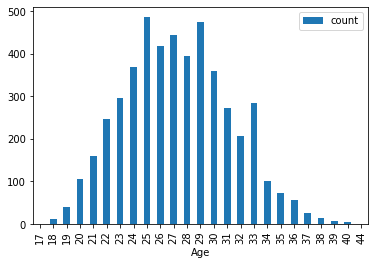

In [53]:
df2_result = df2.where(df2["Overall"]>70).groupBy("Age").count().sort("Age")

pandas_df = df2_result.toPandas()
pandas_df.plot(x = "Age", y = "count", kind = "bar")


Create DF and Basic Operations

In [54]:
df1 = spark.read.format("csv").load("CompleteDataset.csv", inferSchema=True, header=True)


df1.rdd.getNumPartitions()

#Create Temp View/Table
df1.createOrReplaceTempView("football")
sql_q="select _c0 as ID,Name from football"
df3 = spark.sql(sql_q)
df3.show()

#Create and register UDF

def upper_convert(line):
  if len(line)>10:
    return line.upper()
  else:
    return line.lower()
spark.udf.register("UPPER",upper_convert)


df1.createOrReplaceTempView("UDF_football")
sql_q1="select _c0 as ID,UPPER(Name) from football"
df4 = spark.sql(sql_q1)
df4.show()


+---+-----------------+
| ID|             Name|
+---+-----------------+
|  0|Cristiano Ronaldo|
|  1|         L. Messi|
|  2|           Neymar|
|  3|        L. Suárez|
|  4|         M. Neuer|
|  5|   R. Lewandowski|
|  6|           De Gea|
|  7|        E. Hazard|
|  8|         T. Kroos|
|  9|       G. Higuaín|
| 10|     Sergio Ramos|
| 11|     K. De Bruyne|
| 12|      T. Courtois|
| 13|       A. Sánchez|
| 14|        L. Modrić|
| 15|          G. Bale|
| 16|        S. Agüero|
| 17|     G. Chiellini|
| 18|        G. Buffon|
| 19|        P. Dybala|
+---+-----------------+
only showing top 20 rows

+---+-----------------+
| ID|      UPPER(Name)|
+---+-----------------+
|  0|CRISTIANO RONALDO|
|  1|         l. messi|
|  2|           neymar|
|  3|        l. suárez|
|  4|         m. neuer|
|  5|   R. LEWANDOWSKI|
|  6|           de gea|
|  7|        e. hazard|
|  8|         t. kroos|
|  9|       g. higuaín|
| 10|     SERGIO RAMOS|
| 11|     K. DE BRUYNE|
| 12|      T. COURTOIS|
| 13|       a.